当前运行到第 0
当前运行到第 1
当前运行到第 2
当前运行到第 3
当前运行到第 4
当前运行到第 5
当前运行到第 6
当前运行到第 7
当前运行到第 8
当前运行到第 9
当前运行到第 10
当前运行到第 11
当前运行到第 12
当前运行到第 13
当前运行到第 14
当前运行到第 15
当前运行到第 16
当前运行到第 17
当前运行到第 18
当前运行到第 19
当前运行到第 20
当前运行到第 21
当前运行到第 22
当前运行到第 23
当前运行到第 24
当前运行到第 25
当前运行到第 26
当前运行到第 27
当前运行到第 28
当前运行到第 29
当前运行到第 30
当前运行到第 31
当前运行到第 32
当前运行到第 33
当前运行到第 34
当前运行到第 35
当前运行到第 36
当前运行到第 37
当前运行到第 38
当前运行到第 39
当前运行到第 40
当前运行到第 41
当前运行到第 42
当前运行到第 43
当前运行到第 44
当前运行到第 45
当前运行到第 46
当前运行到第 47
当前运行到第 48
当前运行到第 49
当前运行到第 50
当前运行到第 51
当前运行到第 52
当前运行到第 53
当前运行到第 54
当前运行到第 55
当前运行到第 56
当前运行到第 57
当前运行到第 58
当前运行到第 59
当前运行到第 60
当前运行到第 61
当前运行到第 62
当前运行到第 63
当前运行到第 64
当前运行到第 65
当前运行到第 66
当前运行到第 67
当前运行到第 68
当前运行到第 69
当前运行到第 70
当前运行到第 71
当前运行到第 72
当前运行到第 73
当前运行到第 74
当前运行到第 75
当前运行到第 76
当前运行到第 77
当前运行到第 78
当前运行到第 79
当前运行到第 80
当前运行到第 81
当前运行到第 82
当前运行到第 83
当前运行到第 84
当前运行到第 85
当前运行到第 86
当前运行到第 87
当前运行到第 88
当前运行到第 89
当前运行到第 90
当前运行到第 91
当前运行到第 92
当前运行到第 93
当前运行到第 94
当前运行到第 95
当前运行到第 96
当前运行到第 97
当前运行到第 98
当前运行到第 99


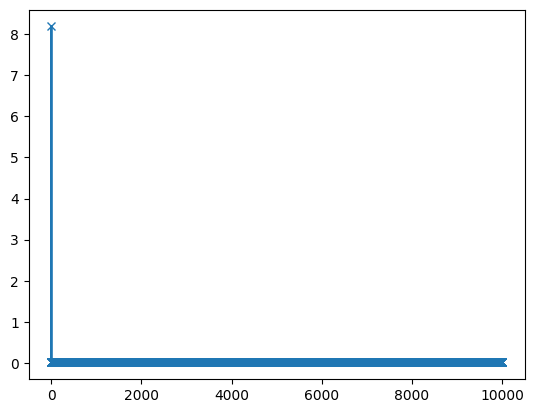

In [7]:
#该代码求解min y=(x3+2)*x2*x1^2
import torch
import torch.nn as nn
from torchsummary import summary
import pdb
import math
import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot
from tensorboardX import SummaryWriter
from torch.utils.tensorboard import SummaryWriter
import torch.nn.init as init
# def fanfunc(x):
#     k=100#y属于(0,k)
#     result = torch.log((x /(k-x))) / 2
#     return result #这里加了绝对值防止对数取负数报错
def fanfunc1(x):
    a=0.05
    b=0.06#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc2(x):
    a=0.35
    b=0.45#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错
def fanfunc3(x):
    a=11
    b=11.5#y属于(0,1)，x属于(a,b)
    result = (b-a)*x+a
    return result #这里加了绝对值防止对数取负数报错


class CustomLayer(nn.Module):
    def __init__(self):
        super(CustomLayer, self).__init__()

    def forward(self, x):
        k=500000
        x1,x2,x3 = x[:, 0], x[:, 1], x[:, 2]
        x1 = fanfunc1(x1)
        x2 = fanfunc2(x2)
        x3 = fanfunc3(x3)
        
        y1 = 1-pow(x2,3)*x3/(71785*pow(x1,4))
        y2 = (4*pow(x2,2)-x1*x2)/(12566*(x2*pow(x1,3)-pow(x1,4)))+1/(5108*pow(x1,2))-1
        y3 = 1-140.45*x1/(x3*pow(x2,2))
        y4 = (x1+x2)/1.5-1
        y5 = (x3+2)*x2*pow(x1,2)


        y1 = F.relu(y1)
        y2 = F.relu(y2)
        y3 = F.relu(y3)
        y4 = F.relu(y4)
        
        y1 = k*y1
        y2 = k*y2
        y3 = k*y3
        y4 = k*y4
       
        return torch.stack([y1, y2, y3, y4, y5], dim=1)
    

class MyNet(nn.Module):
    def __init__(self):
        super(MyNet, self).__init__()
        self.fc1 = nn.Linear(1, 3)
        self.fc2 = CustomLayer()
        self.fc3 = nn.Linear(5, 1)

        self.fc1.weight.requires_grad = True
        self.fc1.bias.requires_grad = False
        #self.fc2.weight.requires_grad = False
        #self.fc2.bias.requires_grad = False
        self.fc3.weight.requires_grad = False
        self.fc3.bias.requires_grad = False

        init.uniform_(self.fc1.weight, 0,1)

#         A=0.5
#         B=28
#         init.uniform_(self.fc1.weight.data[0][0], (2.6-A)/(B-A), (3.6-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[1][0], (0.7-A)/(B-A), (0.8-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[2][0], (17-A)/(B-A), (28-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[3][0], (7.3-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[4][0], (7.8-A)/(B-A), (8.3-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[5][0], (2.9-A)/(B-A), (3.9-A)/(B-A))
#         init.uniform_(self.fc1.weight.data[6][0], (5-A)/(B-A), (5.5-A)/(B-A))
        #init.normal_(self.fc1.weight, mean=0, std=0.01)
        #init.xavier_normal_(self.fc1.weight)

        #self.fc1.weight.data.fill_(0.99) #初始化权重
#         self.fc1.weight.data[0, 0] = 0.7468 # 这是 w1 的初始值
#         self.fc1.weight.data[1, 0] = 0.61 # 这是 w2 的初始值

        self.fc1.bias.data.fill_(0)
        self.fc3.weight.data.fill_(1) #初始化权重
        self.fc3.bias.data.fill_(0)

    def forward(self, x):

        b = self.fc1(x)
        #print(self.fc1.weight) 
        #print('x=',x)
        #print('x_size',x.size())
        #print('b=',b)
        c = self.fc2(b)
        #print('c=',c)
        d = self.fc3(c)
        #print('d=',d)
        #print('w1=',w1)
        #print('w2=',w2)
        return d  
NUM=100
RESULT_MIN=np.zeros(NUM)
RESULT_W1=np.zeros(NUM)
RESULT_W2=np.zeros(NUM)
RESULT_W3=np.zeros(NUM)
RESULT_W4=np.zeros(NUM)
for i in range(NUM):

    print('当前运行到第',i)
    net = MyNet()
    MAX = 10000
    def train(model):
        #model.fc1.reset_parameters()#重置网络参数
        model.train()
        optimizer = optim.Adam(model.parameters(), lr=0.0005)
        train_loss = 0
        x = torch.tensor([[1.0]],requires_grad=True)
        n=1
        R_w1=[]
        R_w2=[]
        R_w3=[]
        R_w4=[]
        R=[]
        prev_loss = float('inf') 
        while True:
            optimizer.zero_grad()
            loss = model(x)
            loss.requires_grad_(True)
            #print('loss=',loss)
            loss.backward()
            
            
            R.append(loss.detach().numpy())
            R_w1.append(model.fc1.weight[0][0].item())
            R_w2.append(model.fc1.weight[1][0].item())
            R_w3.append(model.fc1.weight[2][0].item())
            
            
            optimizer.step()
            k=1
            model.fc1.weight.data.clamp_(0, k)
            train_loss += loss.item()
            n = n+1
            grad_norm = torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            #if abs(prev_grad_norm - grad_norm) < 1e-6:
            
            if loss.item() > prev_loss and n > 500:
            #if n>MAX:
            #if loss.item() < 1e-6:  # 收敛条件
                break
            prev_loss = loss.item()
            if n>10000:
                break

        return loss,np.squeeze(R),R_w1,R_w2,R_w3
    loss=[]
    R=[]
    R_w1=[]
    R_w2=[]
    R_w3=[]
    loss,R,R_w1,R_w2,R_w3=train(net)
    RESULT_MIN[i]=R[np.argmin(R)]
    RESULT_W1[i]=R_w1[np.argmin(R)]
    RESULT_W2[i]=R_w2[np.argmin(R)]
    RESULT_W3[i]=R_w3[np.argmin(R)]




loss,R,R_w1,R_w2,R_w3=train(net)
x=np.arange(len(R))
plt.plot(x,R,marker="x")
plt.show()
# 生成计算图
# x = torch.tensor([[1.0, 1.0]],requires_grad=True)
# out = net(x)
# make_dot(out, params=dict(net.named_parameters()))
writer = SummaryWriter()
writer.add_graph(net, torch.tensor([[1.0]],requires_grad=True))
writer.close()

In [6]:
www=np.argmin(RESULT_MIN)
w1=fanfunc1(RESULT_W1[www])
w2=fanfunc2(RESULT_W2[www])
w3=fanfunc3(RESULT_W3[www])
MIN=min(RESULT_MIN)
print('w1=',w1,'w2=',w2,'w3=',w3,'min=',MIN)

w1= 0.051600527316331864 w2= 0.3545853145420551 w3= 11.416278451681137 min= 0.012666630558669567


In [5]:
x1 = w1
x2 = w2
x3 = w3
y1 = 1-pow(x2,3)*x3/(71785*pow(x1,4))
y2 = (4*pow(x2,2)-x1*x2)/(12566*(x2*pow(x1,3)-pow(x1,4)))+1/(5108*pow(x1,2))-1
y3 = 1-140.45*x1/(x3*pow(x2,2))
y4 = (x1+x2)/1.5-1
y5 = (x3+2)*x2*pow(x1,2)
print('y1-y4:',y1,y2,y3,y4,'F=',y5)

y1-y4: -2.4599662613589146e-06 -4.367758910106545e-07 -4.054870421132036 -0.7273417109251022 F= 0.012665279668224092


In [44]:
RESULT_MIN

array([4.99903594e+05, 2.28820026e-01, 5.00003406e+05, 4.99804969e+05,
       4.99961031e+05, 5.00002469e+05, 4.99962219e+05, 2.12143008e-02,
       5.00001469e+05, 4.99958281e+05, 2.68615365e-01, 4.99958000e+05,
       7.22515061e-02, 2.44307637e-01, 4.99940812e+05, 4.99996344e+05,
       4.99866281e+05, 5.00001500e+05, 5.00001000e+05, 1.56473815e-01,
       4.99883844e+05, 1.80826455e-01, 3.54453400e-02, 2.33581141e-02,
       5.00003250e+05, 6.29325137e-02, 5.00001469e+05, 6.22541420e-02,
       4.61313464e-02, 4.99788938e+05, 2.69785166e-01, 4.99990500e+05,
       5.03248906e+05, 5.00001500e+05, 2.98405170e-01, 4.99761344e+05,
       2.61721760e-01, 5.00002219e+05, 5.00001469e+05, 4.99825094e+05,
       2.73892552e-01, 4.99850094e+05, 5.06840125e+05, 4.99669875e+05,
       4.99969281e+05, 2.15833485e-01, 1.53451324e-01, 9.78878960e-02,
       4.99821188e+05, 4.99816188e+05, 5.00000625e+05, 6.76147565e-02,
       4.99939000e+05, 2.05015540e-01, 5.00004094e+05, 4.99949281e+05,
      

In [1]:
x1 = 0.068377392285119 
x2 = 0.906809078343102
x3 = 2.104438083627877
y1 = 1-pow(x2,3)*x3/(71785*pow(x1,4))
y2 = (4*pow(x2,2)-x1*x2)/(12566*(x2*pow(x1,3)-pow(x1,4)))+1/(5108*pow(x1,2))-1
y3 = 1-140.45*x1/(x3*pow(x2,2))
y4 = (x1+x2)/1.5-1
y5 = (x3+2)*x2*pow(x1,2)
print('y1-y4:',y1,y2,y3,y4,'F=',y5)

y1-y4: 2.5414409521307135e-07 1.7074372267167348e-06 -4.549660376965262 -0.3498756862478527 F= 0.01740181855498208
